# PCA

# Task 1: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\G.S.AZARUDDIN\Downloads\wine.csv")
print(df.head())
print(df.info())
print(df.describe())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

C:\Users\G.S.AZARUDDIN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


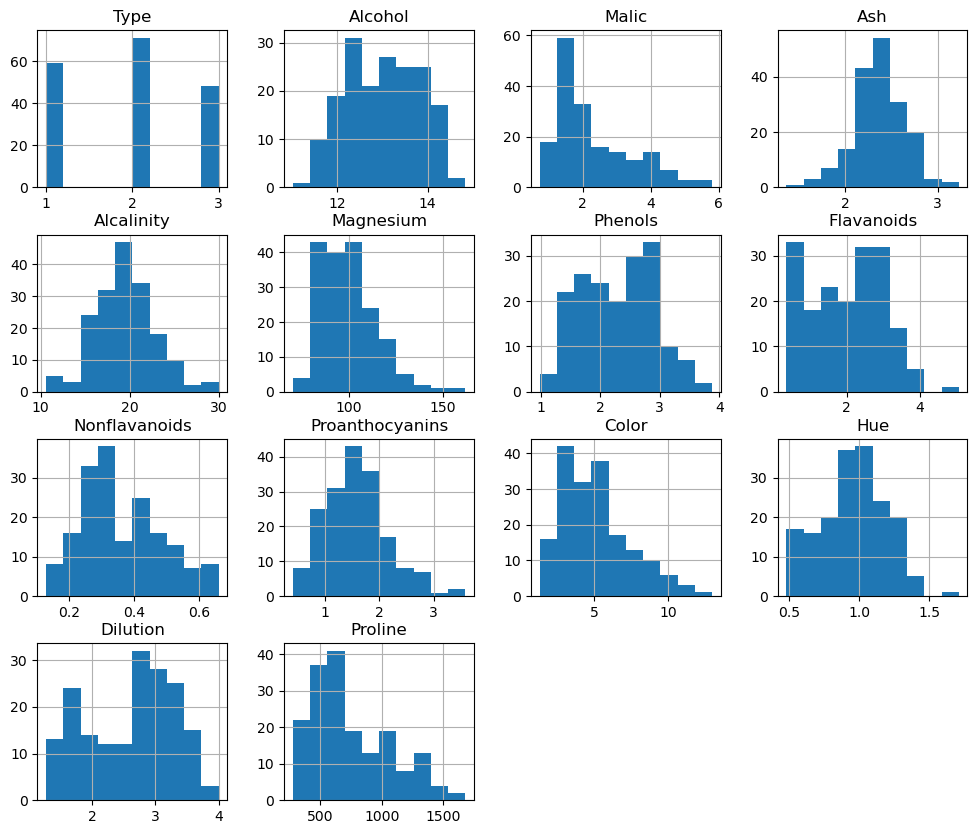

NameError: name 'ceil' is not defined

<Figure size 1200x800 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(12, 10))
plt.show()
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(ceil(len(df.columns)/3), 3, i+1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(12, 10))
plt.show()


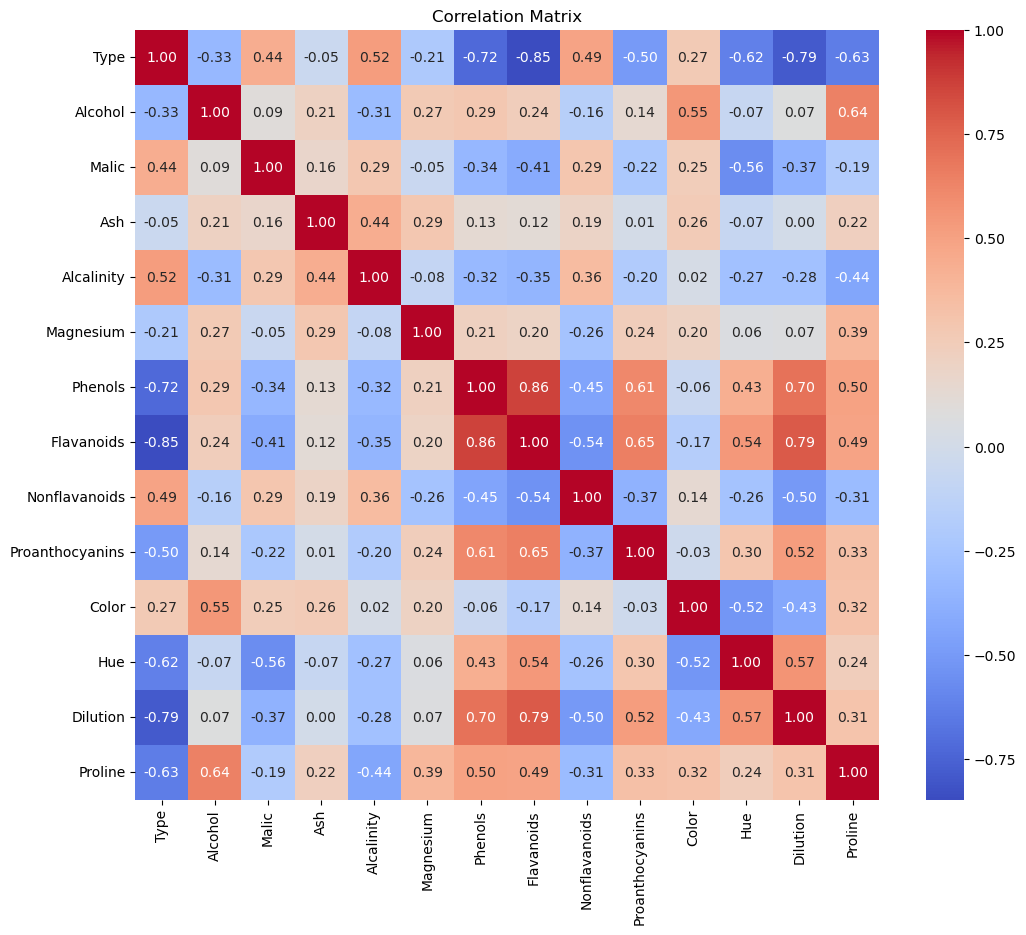

In [4]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Task 2: Dimensionality Reduction with PCA

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

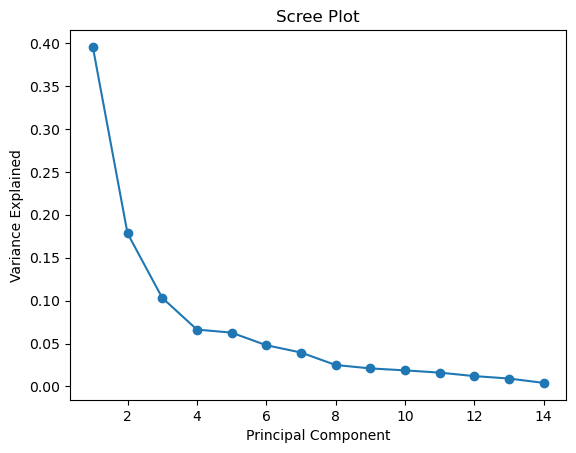

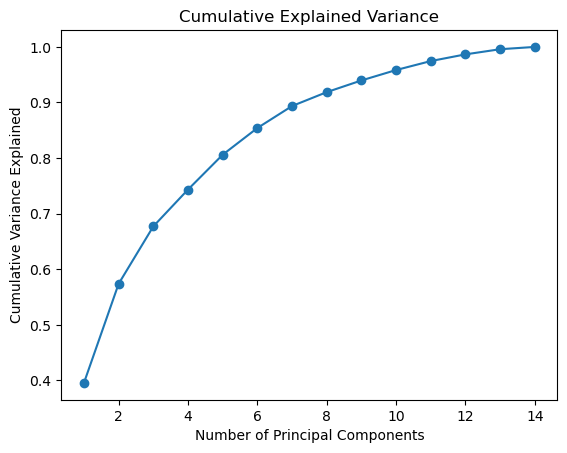

In [8]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca_result = pca.fit_transform(scaled_df)
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance')
plt.show()

In [10]:
n_components = 2 
pca = PCA(n_components=n_components)
pca_transformed = pca.fit_transform(scaled_df)

# Task 3: Clustering with Original Data

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans.fit_predict(scaled_df)
df['Cluster'] = clusters_original


In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', palette='viridis')
plt.title('K-means Clustering on Original Data')
plt.show()

ValueError: Could not interpret value `Cluster` for parameter `hue`

<Figure size 1200x800 with 0 Axes>

In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_avg = silhouette_score(scaled_df, clusters_original)
davies_bouldin = davies_bouldin_score(scaled_df, clusters_original)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.30773604383565206
Davies-Bouldin Index: 1.3163957434114109


# Task 4: Clustering with PCA Data

In [16]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_transformed)

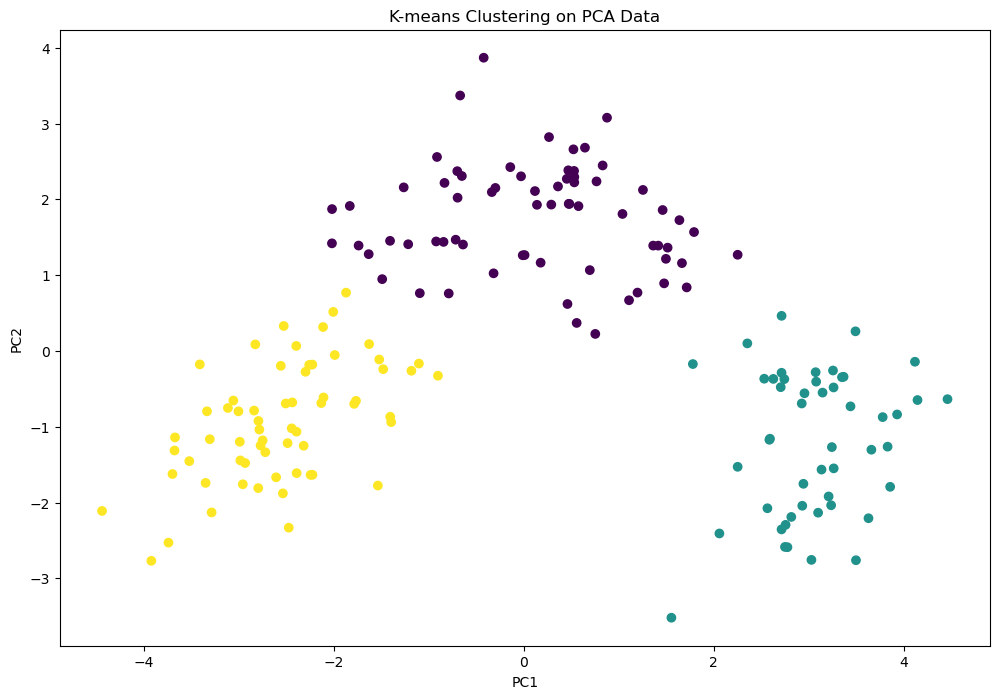

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=clusters_pca, cmap='viridis')
plt.title('K-means Clustering on PCA Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [18]:
silhouette_avg_pca = silhouette_score(pca_transformed, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(pca_transformed, clusters_pca)
print(f'Silhouette Score (PCA): {silhouette_avg_pca}')
print(f'Davies-Bouldin Index (PCA): {davies_bouldin_pca}')


Silhouette Score (PCA): 0.6024415520362845
Davies-Bouldin Index (PCA): 0.5397078562575711


# Task 5: Comparison and Analysis

In [19]:
print(f'Original Data - Silhouette Score: {silhouette_avg}, Davies-Bouldin Index: {davies_bouldin}')
print(f'PCA Data - Silhouette Score: {silhouette_avg_pca}, Davies-Bouldin Index: {davies_bouldin_pca}')

Original Data - Silhouette Score: 0.30773604383565206, Davies-Bouldin Index: 1.3163957434114109
PCA Data - Silhouette Score: 0.6024415520362845, Davies-Bouldin Index: 0.5397078562575711


Discuss Similarities/Differences:

         Reflect on how dimensionality reduction has impacted the clustering results. For instance, did PCA improve clustering performance, or did it make the clusters more or less distinct?

eflect on Dimensionality Reduction:

         Discuss whether reducing dimensions improved or worsened clustering results. This might be due to how PCA captures variance and whether it helps to reveal more meaningful clusters.

Analyze Trade-offs:

    Evaluate the trade-offs between using PCA and clustering directly on the original dataset. Consider computational efficiency, interpretability, and clustering performance.

# Task 6: Conclusion and Insights